# 03 Classification

- K-Nearest Neighbour
- Decision Trees
- Logistic Regression
- Support Vector Machines

# What is Classification?

>classification is a supervised learning approach
- categorizing or "classifying" some unknown items into a discrete set of "classes."
- learn the relationship between a set of feature variables and a target variable of interest.
- target attribute in classification is a categorical variable with discrete values.

<p align="center"> 
<img src="../images/03_Classification/how_classification_works.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/03_Classification/multi_class.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/03_Classification/use_cases.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/03_Classification/applications.png", width=800, height=600>
</p>

## Types of Classification Algorithms 

- Decision Trees
- Naïve Bayes
- Linear Discriminant Analysis
- K-Nearest Neighbor
- Logistic Regression
- Neural Networks
- Support Vector Machines

# K-Nearest Neighbour

<p align="center"> 
<img src="../images/03_Classification/intro_knn.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/03_Classification/determine_class_1_st_knn.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/03_Classification/determine_class_5_knn.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/03_Classification/what_is_knn.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/03_Classification/knn_algorithm.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/03_Classification/calculate_similarity_1d.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/03_Classification/calculate_similarity_2d.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/03_Classification/calculate_similarity_multi.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/03_Classification/best_k.png", width=800, height=600>
</p>

## Import Libraries

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

## Download Dataset

In [2]:
!wget -O ../data/teleCust1000t.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/teleCust1000t.csv

--2019-09-14 23:37:01--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/teleCust1000t.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.193
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 37048 (36K) [text/csv]
Saving to: ‘../data/teleCust1000t.csv’

../data/teleCust100 100%[===================>]  36.18K   175KB/s    in 0.2s    

2019-09-14 23:37:03 (175 KB/s) - ‘../data/teleCust1000t.csv’ saved [37048/37048]



## Load Data

In [3]:
df = pd.read_csv('../data/teleCust1000t.csv')
df.head()

region  tenure  age  marital  address  income  ed  employ  retire  gender  \
0       2      13   44        1        9    64.0   4       5     0.0       0   
1       3      11   33        1        7   136.0   5       5     0.0       0   
2       3      68   52        1       24   116.0   1      29     0.0       1   
3       2      33   33        0       12    33.0   2       0     0.0       1   
4       2      23   30        1        9    30.0   1       2     0.0       0   

   reside  custcat  
0       2        1  
1       6        4  
2       2        3  
3       1        1  
4       4        3

## Visualize and Analyze Data 

In [4]:
df['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6bc9853ef0>]],
      dtype=object)

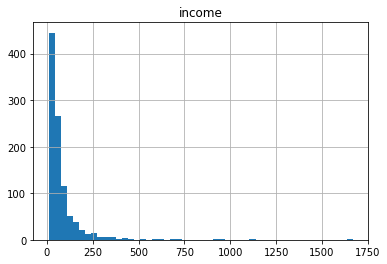

In [5]:
df.hist(column='income', bins=50)

## Define Feature Sets

In [6]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [7]:
X = df[['region', 'tenure','age', 'marital', 'address', 'income', 'ed', 'employ','retire', 'gender', 'reside']] .values  #.astype(float)
X[0:5]


array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.]])

In [8]:
y = df['custcat'].values
y[0:5]

array([1, 4, 3, 1, 3])

## Normalize Data

In [9]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
        -0.44429125, -1.36767088, -0.89182893, -0.22207644, -1.03459817,
         1.16300577]])

## Train Test Split

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (800, 11) (800,)
Test set: (200, 11) (200,)


## K Nearest Neighbor (K-NN) Classification

### Import

In [11]:
from sklearn.neighbors import KNeighborsClassifier

### Train

In [12]:
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

### Predict

In [13]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([1, 1, 3, 2, 4])

## Evaluate Accuracy 

In [14]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.5475
Test set Accuracy:  0.32


## Build the model with k=6

In [15]:
k = 6
neigh6 = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat6 = neigh6.predict(X_test)
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh6.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat6))

Train set Accuracy:  0.51625
Test set Accuracy:  0.31


### Calucalte the accuracy of KNN for different Ks

In [16]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.3  , 0.29 , 0.315, 0.32 , 0.315, 0.31 , 0.335, 0.325, 0.34 ])

## Plot Model Accuracy

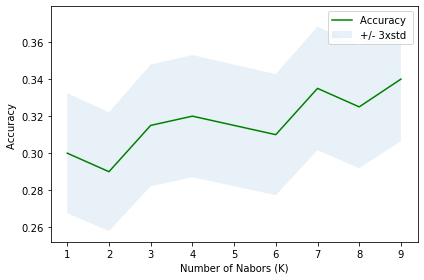

In [17]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [18]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.34 with k= 9


## Evaluation Metrics

<p align="center"> 
<img src="../images/03_Classification/classification_accuracy.png", width=800, height=600>
</p>

>Evaluation metrics explain the performance of a model.
- compare the actual values in the test set with the values predicted by the model, to calculate the accuracy of the model.
- provide insight to areas that might require improvement.

>Model evaluation metrics that are used for classification:
- Jaccard index
- F1-score
- Log Loss

<p align="center"> 
<img src="../images/03_Classification/jaccard_index.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/03_Classification/f1_score.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/03_Classification/log_loss.png", width=800, height=600>
</p>

# Decision Trees

<p align="center"> 
<img src="../images/03_Classification/what_is_decision_trees.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/03_Classification/how_to_build_decision_trees.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/03_Classification/build_decision_tree_with_training_set.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/03_Classification/decision_tree_algorithm.png", width=800, height=600>
</p>

## Building Decision Trees

<p align="center"> 
<img src="../images/03_Classification/build_decision_tree_based_on_data_set.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/03_Classification/which_attribute.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/03_Classification/bad_attribute_cholestrol.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/03_Classification/good_attribute_sex.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/03_Classification/pure_node.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/03_Classification/entropy.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/03_Classification/entropy_before_split.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/03_Classification/entropy_cholestrol.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/03_Classification/entropy_sex.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/03_Classification/cholestrol_vs_sex.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/03_Classification/information_gain.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/03_Classification/calculate_information_gain.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/03_Classification/build_decision_tree_process.png", width=800, height=600>
</p>

## Build a model from historical data of patients
>build a model from historical data of patients, and their respond to different medications. 

>use the trained decision tree to predict the class of a unknown patient, or to find a proper drug for a new patient.

## Import Libraries

In [1]:
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

## Download Data

In [2]:
!wget -O ../data/drug200.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/drug200.csv

--2019-09-16 14:14:58--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/drug200.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.193
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6027 (5.9K) [text/csv]
Saving to: ‘../data/drug200.csv’

../data/drug200.csv 100%[===================>]   5.89K  --.-KB/s    in 0s      

2019-09-16 14:15:00 (251 MB/s) - ‘../data/drug200.csv’ saved [6027/6027]



## Read Data

In [3]:
df = pd.read_csv("../data/drug200.csv", delimiter=",")
df.head()

Age Sex      BP Cholesterol  Na_to_K   Drug
0   23   F    HIGH        HIGH   25.355  drugY
1   47   M     LOW        HIGH   13.093  drugC
2   47   M     LOW        HIGH   10.114  drugC
3   28   F  NORMAL        HIGH    7.798  drugX
4   61   F     LOW        HIGH   18.043  drugY

In [8]:
df.shape

(200, 6)

## Pre-process Data

### Define Feature Matrix

In [9]:
X = df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
X[:5]

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.113999999999999],
       [28, 'F', 'NORMAL', 'HIGH', 7.797999999999999],
       [61, 'F', 'LOW', 'HIGH', 18.043]], dtype=object)

### Convert catergorical features to numerical values
>use pandas.get_dummies() to convert categorical variable into dummy/indicator variables.

In [10]:
from sklearn import preprocessing
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F','M'])
X[:,1] = le_sex.transform(X[:,1]) 

In [11]:
le_BP = preprocessing.LabelEncoder()
le_BP.fit([ 'LOW', 'NORMAL', 'HIGH'])
X[:,2] = le_BP.transform(X[:,2])

In [12]:
le_Chol = preprocessing.LabelEncoder()
le_Chol.fit([ 'NORMAL', 'HIGH'])
X[:,3] = le_Chol.transform(X[:,3]) 

In [13]:
X[:5]

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.113999999999999],
       [28, 0, 2, 0, 7.797999999999999],
       [61, 0, 1, 0, 18.043]], dtype=object)

### Define Target Variable

In [14]:
y = df["Drug"]
y[:5]

0    drugY
1    drugC
2    drugC
3    drugX
4    drugY
Name: Drug, dtype: object

## Set up Decision Tree

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

In [21]:
X.shape,y.shape

((200, 5), (200,))

In [19]:
X_train.shape,y_train.shape

((140, 5), (140,))

In [20]:
X_test.shape,y_test.shape

((60, 5), (60,))

## Model

>specify criterion="entropy" so we can see the information gain of each node.

In [22]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
drugTree

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

## Train

In [23]:
drugTree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

## Predict

In [24]:
predTree = drugTree.predict(X_test)

In [27]:
print(predTree[:5])
print(y_test[:5].values)

['drugY' 'drugX' 'drugX' 'drugX' 'drugX']
['drugY' 'drugX' 'drugX' 'drugX' 'drugX']


## Evaluate

In [30]:
from sklearn import metrics
import matplotlib.pyplot as plt
print(f"DecisionTrees's Accuracy: {metrics.accuracy_score(y_test, predTree)}")

DecisionTrees's Accuracy: 0.9833333333333333


## Visualize 

In [32]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

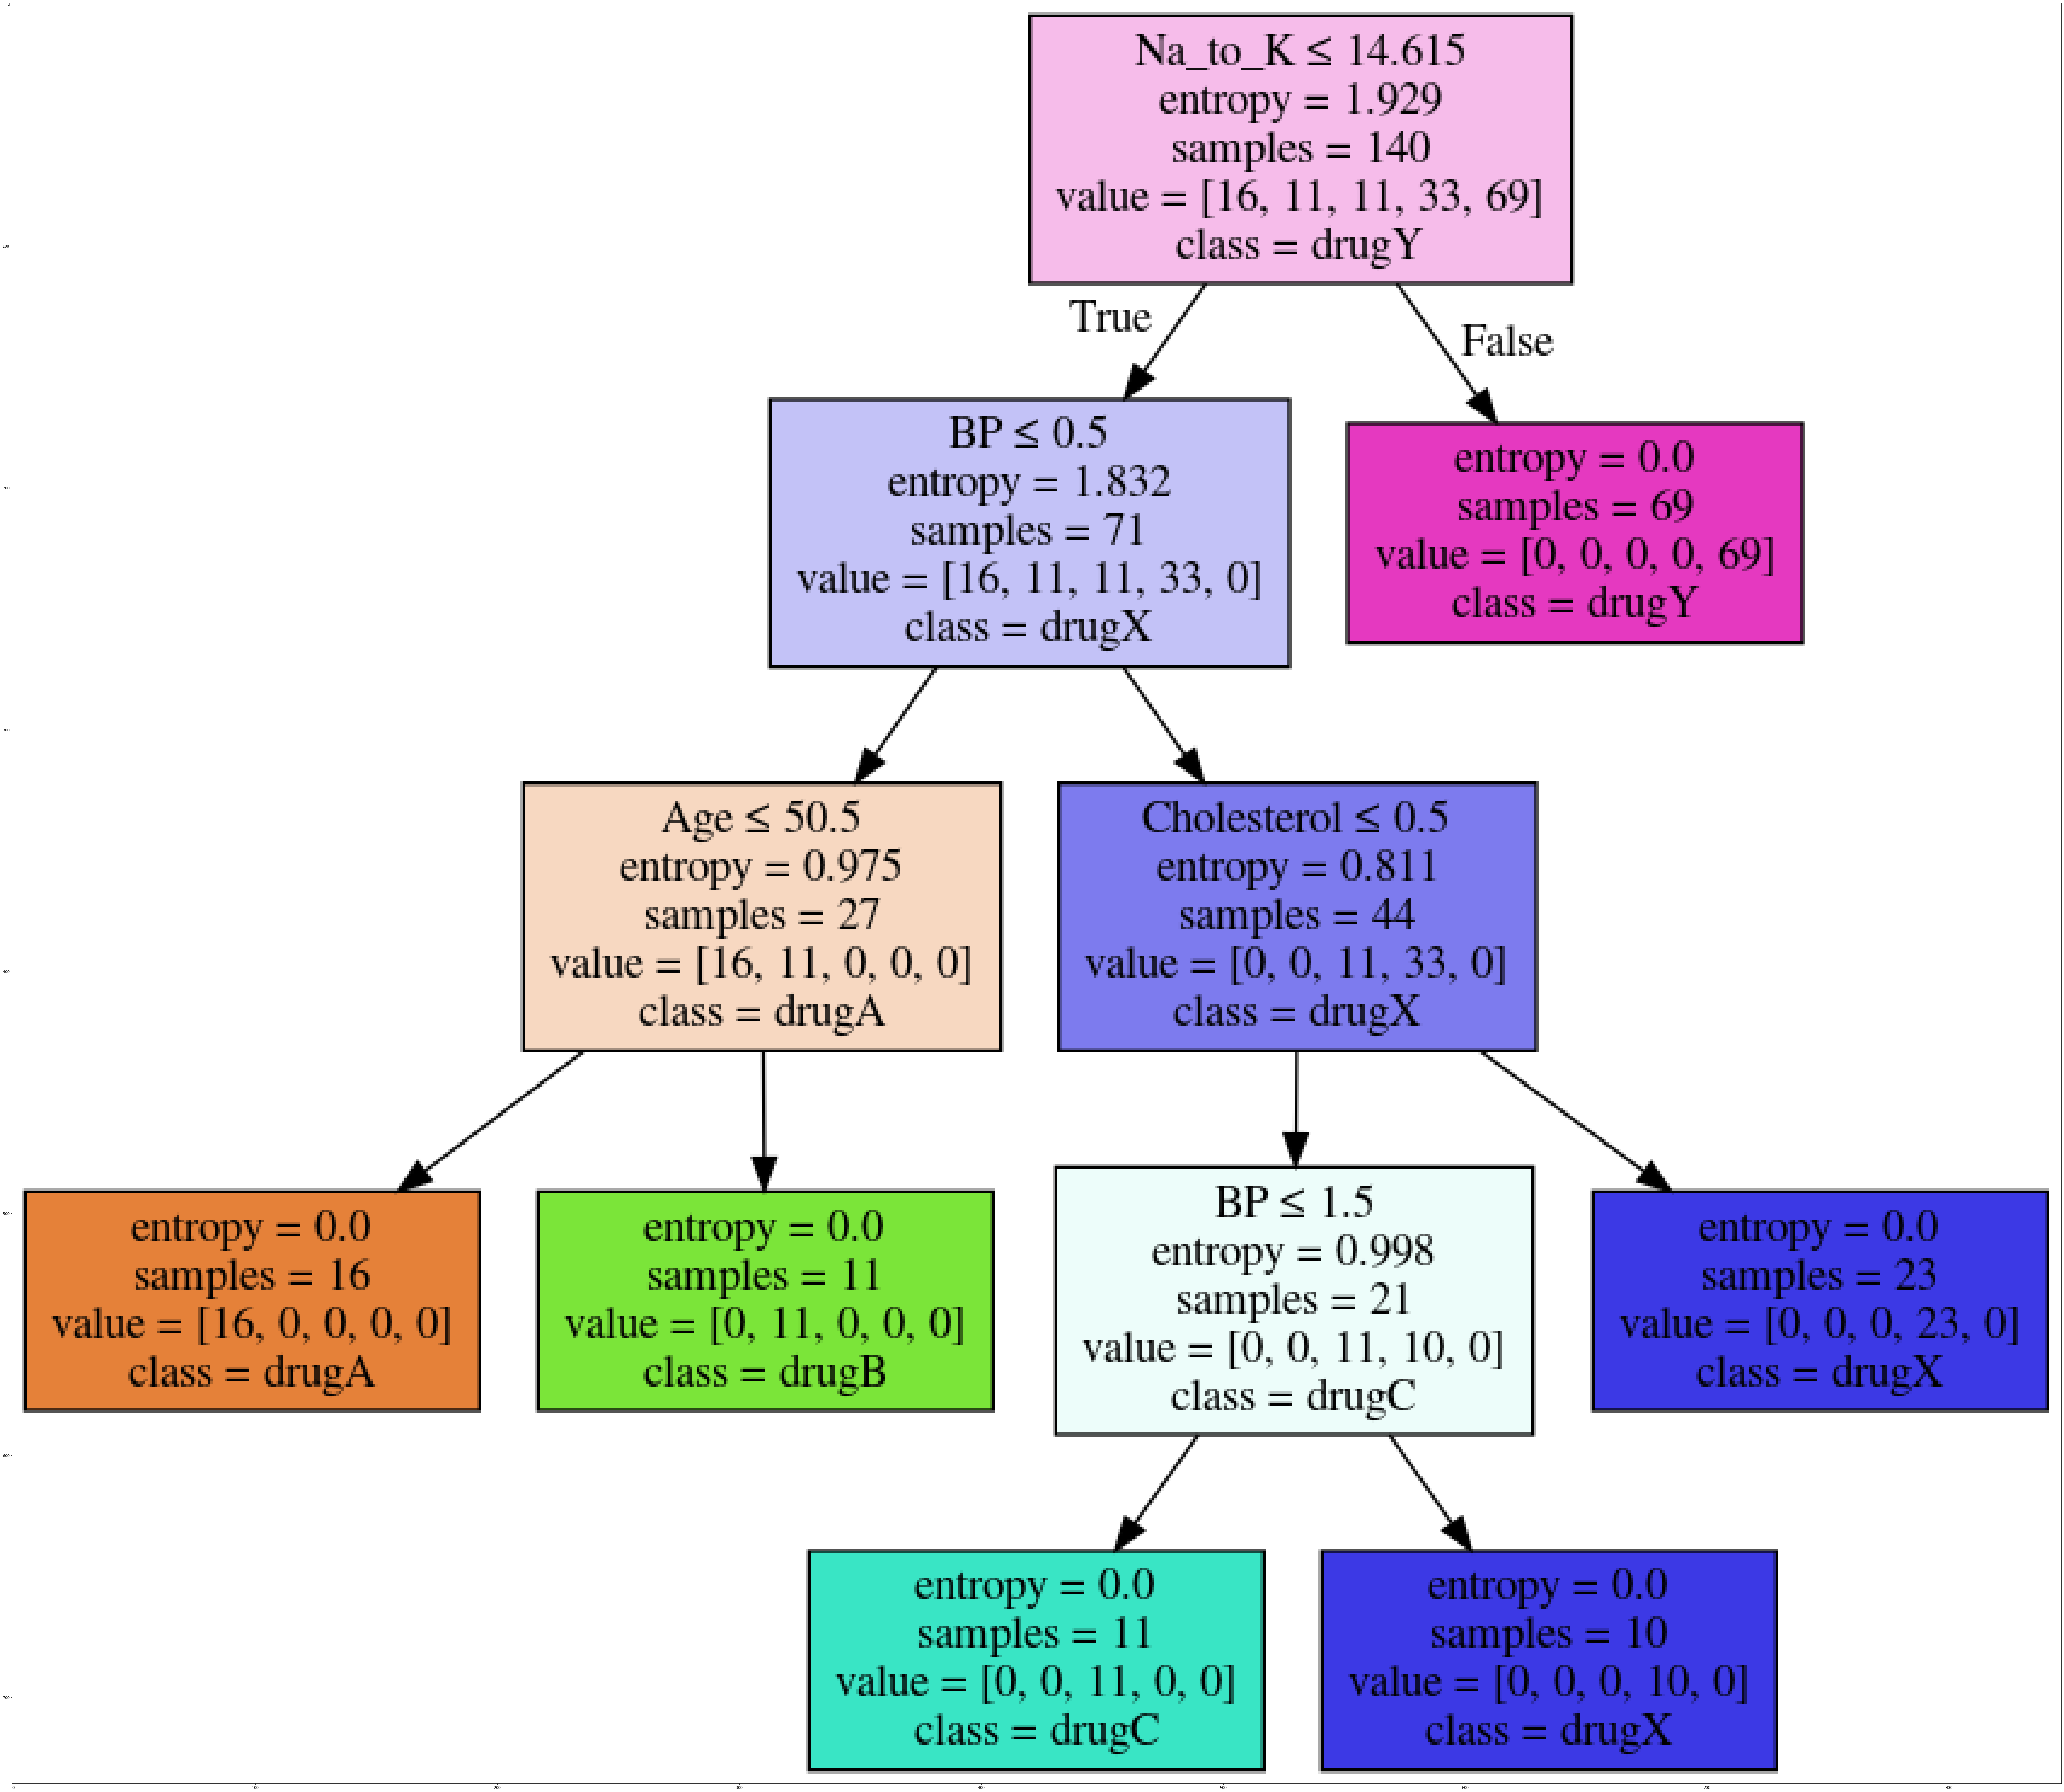

In [35]:
dot_data = StringIO()
filename = "../figs/03_Classification/drugtree.png"
featureNames = df.columns[0:5]
targetNames = df["Drug"].unique().tolist()
out=tree.export_graphviz(drugTree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_train), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

# Logistic Regression

<p align="center"> 
<img src="../images/03_Classification/what_is_logistic_regression.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/03_Classification/logistic_regression_applications.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/03_Classification/when_use_logistic_regression.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/03_Classification/build_customer_churn_model.png", width=800, height=600>
</p>

## Customer churn with Logistic Regression
>create a model for a telecommunication company, to predict when its customers will leave for a competitor, so that they can take some action to retain the customers.

>use Logistic Regression for guidance on what would be the most probable class for a data point in order to estimate the class of that data point.

>Logistic Regression is a variation of Linear Regression, useful when the observed dependent variable, y, is categorical. 

>It produces a formula that predicts the probability of the class label as a function of the independent variables.

<img
src="../images/03_Classification/model_output_probability_sigmoid.png" width = "700" align = "center">

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt

## Download Data

In [2]:
!wget -O ../data/ChurnData.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/ChurnData.csv

--2019-09-17 10:32:43--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/ChurnData.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.193
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36144 (35K) [text/csv]
Saving to: ‘../data/ChurnData.csv’

../data/ChurnData.c 100%[===================>]  35.30K  --.-KB/s    in 0.1s    

2019-09-17 10:32:45 (266 KB/s) - ‘../data/ChurnData.csv’ saved [36144/36144]



## Load Data

In [3]:
df = pd.read_csv("../data/ChurnData.csv")
df.head()

tenure   age  address  income   ed  employ  equip  callcard  wireless  \
0    11.0  33.0      7.0   136.0  5.0     5.0    0.0       1.0       1.0   
1    33.0  33.0     12.0    33.0  2.0     0.0    0.0       0.0       0.0   
2    23.0  30.0      9.0    30.0  1.0     2.0    0.0       0.0       0.0   
3    38.0  35.0      5.0    76.0  2.0    10.0    1.0       1.0       1.0   
4     7.0  35.0     14.0    80.0  2.0    15.0    0.0       1.0       0.0   

   longmon  ...  pager  internet  callwait  confer  ebill  loglong  logtoll  \
0     4.40  ...    1.0       0.0       1.0     1.0    0.0    1.482    3.033   
1     9.45  ...    0.0       0.0       0.0     0.0    0.0    2.246    3.240   
2     6.30  ...    0.0       0.0       0.0     1.0    0.0    1.841    3.240   
3     6.05  ...    1.0       1.0       1.0     1.0    1.0    1.800    3.807   
4     7.10  ...    0.0       0.0       1.0     1.0    0.0    1.960    3.091   

   lninc  custcat  churn  
0  4.913      4.0    1.0  
1  3.497      1.0    1.0  
2  3.401      3.0    0.0  
3  4.331      4.0    0.0  
4  4.382      3.0    0.0  

[5 rows x 28 columns]

## Pre-process Data

>select features for the modeling and change the target data type to be integer.

In [6]:
df = df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',   'callcard', 'wireless','churn']]
df['churn'] = df['churn'].astype('int')
df.head()

tenure   age  address  income   ed  employ  equip  callcard  wireless  \
0    11.0  33.0      7.0   136.0  5.0     5.0    0.0       1.0       1.0   
1    33.0  33.0     12.0    33.0  2.0     0.0    0.0       0.0       0.0   
2    23.0  30.0      9.0    30.0  1.0     2.0    0.0       0.0       0.0   
3    38.0  35.0      5.0    76.0  2.0    10.0    1.0       1.0       1.0   
4     7.0  35.0     14.0    80.0  2.0    15.0    0.0       1.0       0.0   

   churn  
0      1  
1      1  
2      0  
3      0  
4      0

In [7]:
df.shape

(200, 10)

In [13]:
df.columns

Index(['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',
       'callcard', 'wireless', 'churn'],
      dtype='object')

### Define Feature Matrix 

In [14]:
X = np.asarray(df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']])
X[:5]

array([[ 11.,  33.,   7., 136.,   5.,   5.,   0.],
       [ 33.,  33.,  12.,  33.,   2.,   0.,   0.],
       [ 23.,  30.,   9.,  30.,   1.,   2.,   0.],
       [ 38.,  35.,   5.,  76.,   2.,  10.,   1.],
       [  7.,  35.,  14.,  80.,   2.,  15.,   0.]])

### Define Target Variable

In [15]:
y = np.asarray(df['churn'])
y [:5]

array([1, 1, 0, 0, 0])

## Normalize Dataset

In [16]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[:5]

array([[-1.13518441, -0.62595491, -0.4588971 ,  0.4751423 ,  1.6961288 ,
        -0.58477841, -0.85972695],
       [-0.11604313, -0.62595491,  0.03454064, -0.32886061, -0.6433592 ,
        -1.14437497, -0.85972695],
       [-0.57928917, -0.85594447, -0.261522  , -0.35227817, -1.42318853,
        -0.92053635, -0.85972695],
       [ 0.11557989, -0.47262854, -0.65627219,  0.00679109, -0.6433592 ,
        -0.02518185,  1.16316   ],
       [-1.32048283, -0.47262854,  0.23191574,  0.03801451, -0.6433592 ,
         0.53441472, -0.85972695]])

## Split Dataset into Train and Test Set

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (160, 7) (160,)
Test set: (40, 7) (40,)


## Model

>model using LogisticRegression from Scikit-learn package. 

>use liblinear numerical optimizer to find parameters

>Regularization
- Regularization is a technique used to solve the overfitting problem in machine learning models. 
- C parameter indicates inverse of regularization strength which must be a positive float. Smaller values specify stronger regularization.

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

## Predict

In [19]:
yhat = LR.predict(X_test)
yhat

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0])

> predict_proba returns estimates for all classes, ordered by the label of classes. 
- first column is the probability of class 1, P(Y=1|X)
- second column is probability of class 0, P(Y=0|X):

In [20]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.54132919, 0.45867081],
       [0.60593357, 0.39406643],
       [0.56277713, 0.43722287],
       [0.63432489, 0.36567511],
       [0.56431839, 0.43568161],
       [0.55386646, 0.44613354],
       [0.52237207, 0.47762793],
       [0.60514349, 0.39485651],
       [0.41069572, 0.58930428],
       [0.6333873 , 0.3666127 ],
       [0.58068791, 0.41931209],
       [0.62768628, 0.37231372],
       [0.47559883, 0.52440117],
       [0.4267593 , 0.5732407 ],
       [0.66172417, 0.33827583],
       [0.55092315, 0.44907685],
       [0.51749946, 0.48250054],
       [0.485743  , 0.514257  ],
       [0.49011451, 0.50988549],
       [0.52423349, 0.47576651],
       [0.61619519, 0.38380481],
       [0.52696302, 0.47303698],
       [0.63957168, 0.36042832],
       [0.52205164, 0.47794836],
       [0.50572852, 0.49427148],
       [0.70706202, 0.29293798],
       [0.55266286, 0.44733714],
       [0.52271594, 0.47728406],
       [0.51638863, 0.48361137],
       [0.71331391, 0.28668609],
       [0.

## Evaluate

### Jaccard Index

In [30]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat)

0.375

### Confusion Matrix

In [31]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [32]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [33]:
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[ 6  9]
 [ 1 24]]


In [34]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)

Confusion matrix, without normalization
[[ 6  9]
 [ 1 24]]


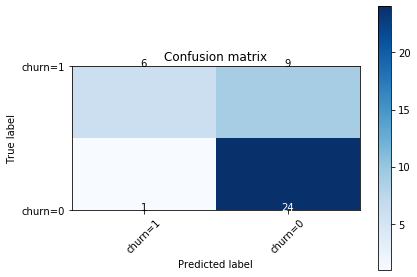

In [35]:
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

In [36]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.73      0.96      0.83        25
           1       0.86      0.40      0.55        15

    accuracy                           0.75        40
   macro avg       0.79      0.68      0.69        40
weighted avg       0.78      0.75      0.72        40



### Log Loss

In [37]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.6017092478101185

## Logistic Regression vs Linear Regression

<p align="center"> 
<img src="../images/03_Classification/model_of_customer_churn_data.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/03_Classification/predict_customer_income_with_linear_regression.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/03_Classification/predict_customer_churn_with_linear_regression.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/03_Classification/linear_regression_classification_problems.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/03_Classification/problem_with_linear_regression.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/03_Classification/sigmoid_function_logistic_regression.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/03_Classification/customer_chrun_model_clarification.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/03_Classification/logistic_regression_training_process.png", width=800, height=600>
</p>

## Training of Logistic Regression Model

<p align="center"> 
<img src="../images/03_Classification/general_cost_function.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/03_Classification/plot_cost_function.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/03_Classification/logistic_regression_cost_function.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/03_Classification/minimize_cost_function.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/03_Classification/use_gradient_descent.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/03_Classification/logistic_regression_training_algorithm.png", width=800, height=600>
</p>

# Support Vector Machines

<p align="center"> 
<img src="../images/03_Classification/classification_with_svm.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/03_Classification/what_is_svm_curve.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/03_Classification/what_is_svm_plane.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/03_Classification/data_transformation_kernelling.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/03_Classification/use_svm_find_hyperplane.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/03_Classification/pros_cons_svm.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/03_Classification/svm_applications.png", width=800, height=600>
</p>

## Classify cells to benign or malignant
>build and train a model using human cell records, and classify cells to whether the samples are benign or malignant.

## Import Libraries

In [39]:
import numpy as np
import pandas as pd
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline 
import matplotlib.pyplot as plt

## Download Data

In [40]:
!wget -O ../data/cell_samples.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/cell_samples.csv

--2019-09-17 12:51:53--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/cell_samples.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.193
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20675 (20K) [text/csv]
Saving to: ‘../data/cell_samples.csv’

../data/cell_sample 100%[===================>]  20.19K  --.-KB/s    in 0s      

2019-09-17 12:51:55 (55.7 MB/s) - ‘../data/cell_samples.csv’ saved [20675/20675]



## Load Data

In [41]:
df = pd.read_csv("../data/cell_samples.csv")
df.head()

ID  Clump  UnifSize  UnifShape  MargAdh  SingEpiSize BareNuc  \
0  1000025      5         1          1        1            2       1   
1  1002945      5         4          4        5            7      10   
2  1015425      3         1          1        1            2       2   
3  1016277      6         8          8        1            3       4   
4  1017023      4         1          1        3            2       1   

   BlandChrom  NormNucl  Mit  Class  
0           3         1    1      2  
1           3         2    1      2  
2           3         1    1      2  
3           3         7    1      2  
4           3         1    1      2

## Visualize Data

> distribution of the classes based on Clump thickness and Uniformity of cell size

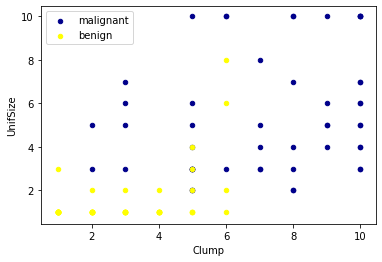

In [42]:
ax = df[df['Class'] == 4][:50].plot(kind='scatter', x='Clump', y='UnifSize', color='DarkBlue', label='malignant');
df[df['Class'] == 2][:50].plot(kind='scatter', x='Clump', y='UnifSize', color='Yellow', label='benign', ax=ax);
plt.show()

## Pre-process Data

In [43]:
# look at columns data types
df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

>BareNuc column includes some values that are not numerical
- drop non-numerical values

In [45]:
df = df[pd.to_numeric(df['BareNuc'], errors='coerce').notnull()]
df['BareNuc'] = df['BareNuc'].astype('int')
df.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int64
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

### Define Feature Matrix 

In [46]:
feature_df = df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]
X = np.asarray(feature_df)
X[:5]

array([[ 5,  1,  1,  1,  2,  1,  3,  1,  1],
       [ 5,  4,  4,  5,  7, 10,  3,  2,  1],
       [ 3,  1,  1,  1,  2,  2,  3,  1,  1],
       [ 6,  8,  8,  1,  3,  4,  3,  7,  1],
       [ 4,  1,  1,  3,  2,  1,  3,  1,  1]])

### Define Target Variable

In [47]:
df['Class'] = df['Class'].astype('int')
y = np.asarray(df['Class'])
y [:5]

array([2, 2, 2, 2, 2])

## Split Dataset into Train and Test Set

In [48]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (546, 9) (546,)
Test set: (137, 9) (137,)


## Model

>Kernelling
- mapping data into a higher dimensional space 

>Kernel function
- The mathematical function used for the transformation

>Kernel function types:
1. Linear
2. Polynomial
3. Radial basis function (RBF)
4. Sigmoid

>usually choose different functions in turn and compare the results.

In [50]:
from sklearn import svm
clf = svm.SVC(kernel='rbf', gamma='scale')
clf.fit(X_train, y_train) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

## Predict

In [51]:
yhat = clf.predict(X_test)
yhat[:5]

array([2, 4, 2, 4, 2])

## Evaluate

### Confusion Matrix

In [52]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [53]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [54]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[2,4])
np.set_printoptions(precision=2)

In [55]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137



Confusion matrix, without normalization
[[85  5]
 [ 0 47]]


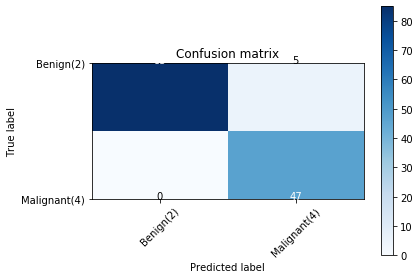

In [56]:
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Benign(2)','Malignant(4)'],normalize= False,  title='Confusion matrix')